In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import StratifiedShuffleSplit
import statsmodels.api as sm
from sklearn.decomposition import PCA

In [38]:
df = pd.read_csv("base_cleaned_data.csv")

In [39]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_num = df[num_cols].copy()

c:\Users\nnn60\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 32972 (\N{CJK UNIFIED IDEOGRAPH-80CC}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\nnn60\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 34399 (\N{CJK UNIFIED IDEOGRAPH-865F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\nnn60\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32972 (\N{CJK UNIFIED IDEOGRAPH-80CC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nnn60\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 34399 (\N{CJK UNIFIED IDEOGRAPH-865F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


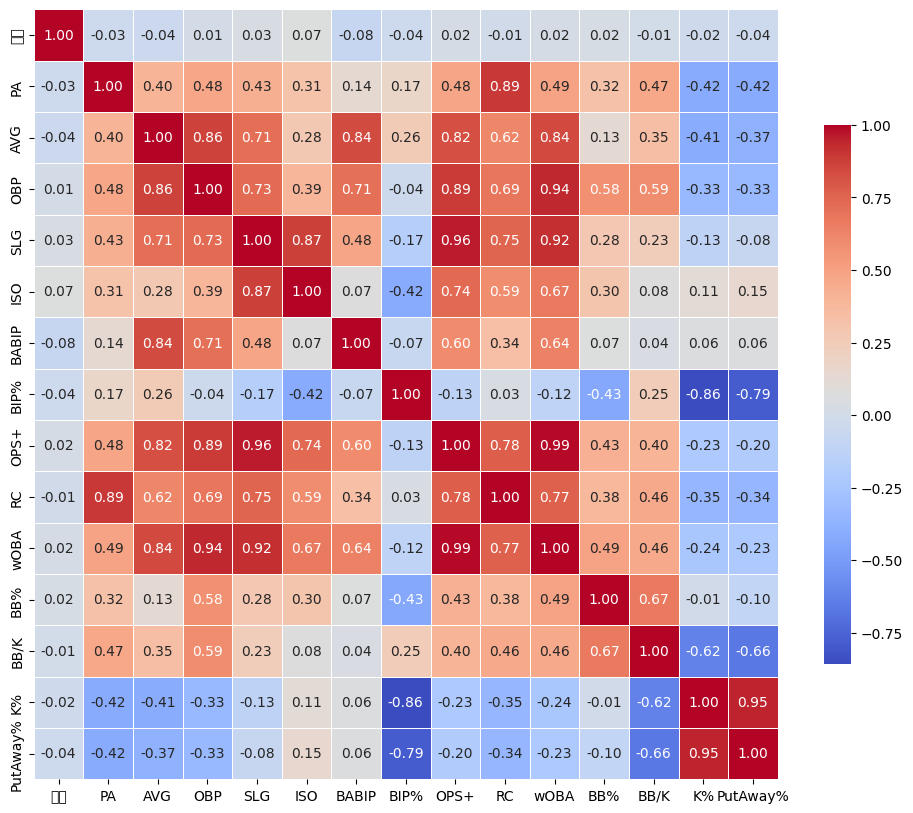

In [40]:
corr = df_num[num_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    ax=ax
)
plt.show()

In [41]:
df_model = df_num.drop(columns=['背號', 'BIP%'])

In [42]:
X = df_model.drop(columns=['OPS+'])
y = df_model['OPS+']

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=99
)

In [45]:
model = HuberRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\nnn60\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_huber.py:348: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


c:\Users\nnn60\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_huber.py:348: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\nnn60\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_huber.py:348: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


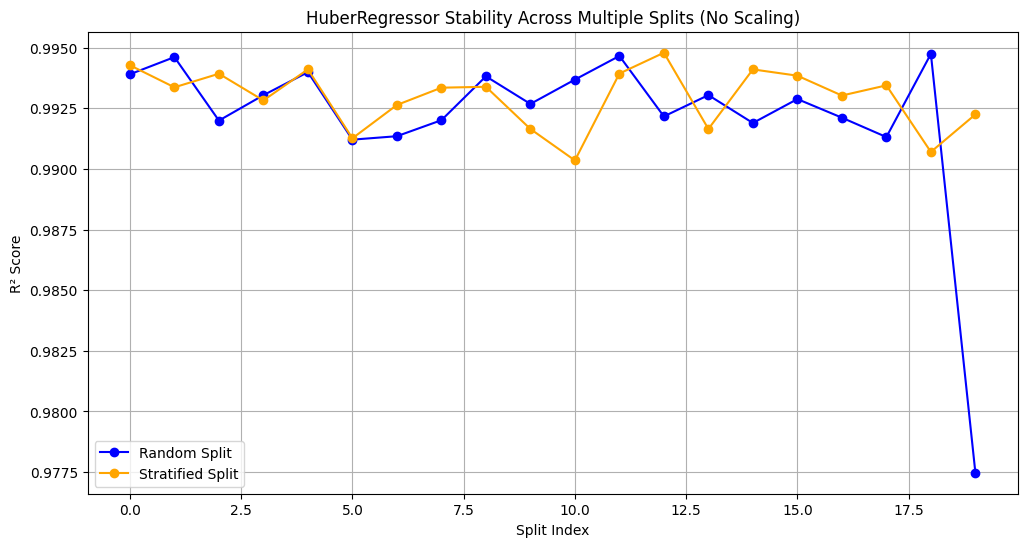

In [46]:
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 將 y 分箱方便 stratified
y_binned = pd.qcut(y, q=5, labels=False)

n_splits = 20
mse_random = []
r2_random = []

# 普通隨機拆分
for i in range(n_splits):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=i
    )
    model = HuberRegressor(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_random.append(mean_squared_error(y_test, y_pred))
    r2_random.append(r2_score(y_test, y_pred))

# Stratified 拆分
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=99)
mse_strat = []
r2_strat = []

for train_idx, test_idx in sss.split(X, y_binned):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model = HuberRegressor(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_strat.append(mean_squared_error(y_test, y_pred))
    r2_strat.append(r2_score(y_test, y_pred))

# 畫折線圖 - R2 指標
plt.figure(figsize=(12,6))
plt.plot(range(n_splits), r2_random, marker='o', label='Random Split', color='blue')
plt.plot(range(n_splits), r2_strat, marker='o', label='Stratified Split', color='orange')
plt.xlabel('Split Index')
plt.ylabel('R² Score')
plt.title('HuberRegressor Stability Across Multiple Splits (No Scaling)')
plt.legend()
plt.grid(True)
plt.show()



In [47]:
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
r21 = r2_score(y_test, y_pred)
k = X_test.shape[1]
n = X_test.shape[0]
adj_r21 = 1 - (1 - r2)*(n-1)/(n-k-1)
resid = y_test - y_pred
rss = np.sum(resid**2)
aic1 = n * np.log(rss/n) + 2*k
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"Adjusted R^2: {adj_r2:.4f}")
print(f"AIC: {aic:.4f}")

RMSE: 5.8233
R^2: 0.9523
Adjusted R^2: 0.9359
AIC: 193.1397


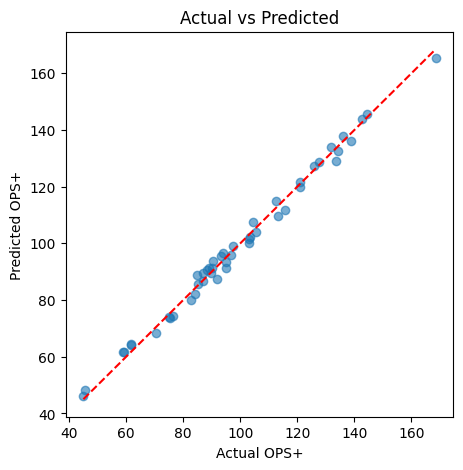

In [48]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y_test, y_pred, alpha=0.6)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax.set_xlabel("Actual OPS+")
ax.set_ylabel("Predicted OPS+")
ax.set_title("Actual vs Predicted")
plt.show()

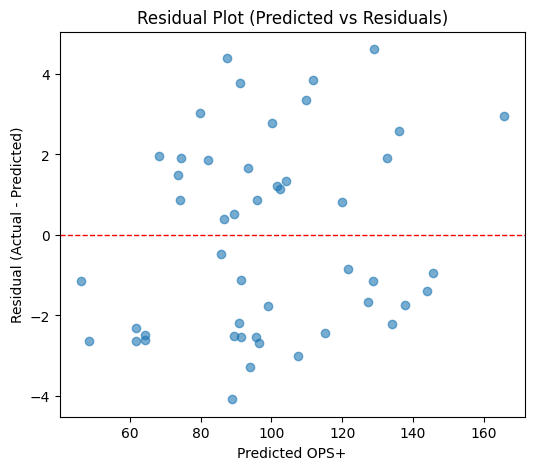

In [49]:
residuals = y_test - y_pred

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(y_pred, residuals, alpha=0.6)
ax.axhline(0, color='red', linestyle='--', linewidth=1)

ax.set_xlabel("Predicted OPS+")
ax.set_ylabel("Residual (Actual - Predicted)")
ax.set_title("Residual Plot (Predicted vs Residuals)")

plt.show()

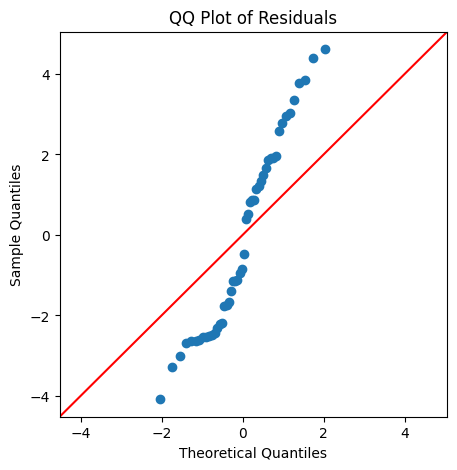

In [50]:
fig, ax = plt.subplots(figsize=(5,5))
sm.qqplot(residuals, line='45', ax=ax)
ax.set_title("QQ Plot of Residuals")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")
plt.show()

In [51]:
pca = PCA(n_components=0.95)  # 保留 95% 變異量
X_pca = pca.fit_transform(X_scaled)
print(f"原始維度: {X_scaled.shape[1]}, PCA後維度: {X_pca.shape[1]}")

原始維度: 12, PCA後維度: 5


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=99
)

In [53]:
model = HuberRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
r22 = r2_score(y_test, y_pred)
k = X_test.shape[1]
n = X_test.shape[0]
adj_r22 = 1 - (1 - r22) * (n - 1) / (n - k - 1)
resid = y_test - y_pred
rss = np.sum(resid**2)
aic2 = n * np.log(rss / n) + 2 * k
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"Adjusted R^2: {adj_r2:.4f}")
print(f"AIC: {aic:.4f}")

RMSE: 5.8233
R^2: 0.9523
Adjusted R^2: 0.9359
AIC: 193.1397


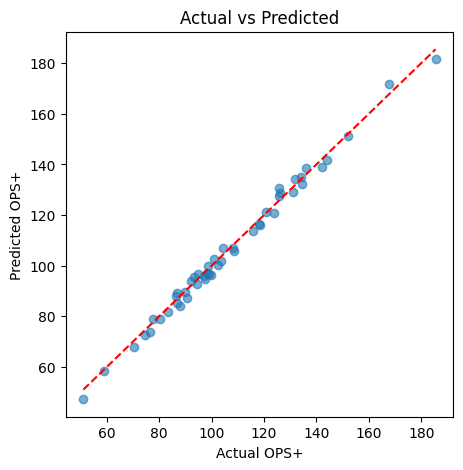

In [55]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y_test, y_pred, alpha=0.6)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax.set_xlabel("Actual OPS+")
ax.set_ylabel("Predicted OPS+")
ax.set_title("Actual vs Predicted")
plt.show()

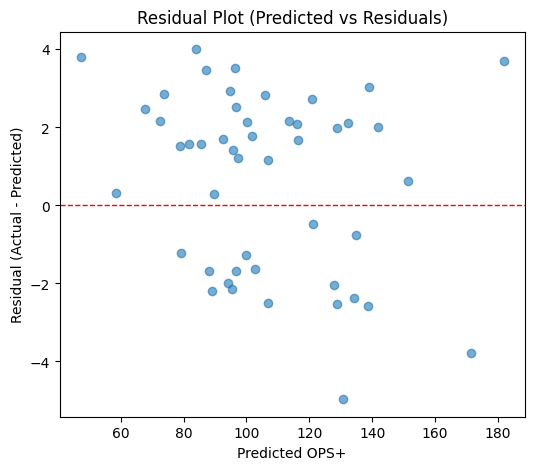

In [56]:
residuals = y_test - y_pred

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(y_pred, residuals, alpha=0.6)
ax.axhline(0, color='red', linestyle='--', linewidth=1)

ax.set_xlabel("Predicted OPS+")
ax.set_ylabel("Residual (Actual - Predicted)")
ax.set_title("Residual Plot (Predicted vs Residuals)")

plt.show()

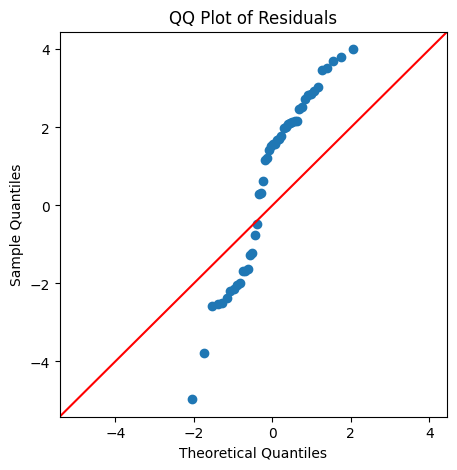

In [57]:
fig, ax = plt.subplots(figsize=(5,5))
sm.qqplot(residuals, line='45', ax=ax)
ax.set_title("QQ Plot of Residuals")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")
plt.show()

In [58]:
y_log = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_log, test_size=0.3, random_state=99
)
model = HuberRegressor()
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)

resid_log = y_test - y_pred_log
sigma2 = np.var(resid_log, ddof=1)

y_pred = np.expm1(y_pred_log + 0.5*sigma2)
y_test_orig = np.expm1(y_test)

c:\Users\nnn60\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_huber.py:348: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [59]:
rmse3 = np.sqrt(mean_squared_error(y_test_orig, y_pred))
r23 = r2_score(y_test_orig, y_pred)
k = X_test.shape[1]
n = X_test.shape[0]
adj_r23 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

resid = y_test_orig - y_pred
rss = np.sum(resid**2)
aic3 = n * np.log(rss / n) + 2 * k

print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"Adjusted R^2: {adj_r2:.4f}")
print(f"AIC: {aic:.4f}")

RMSE: 5.8233
R^2: 0.9523
Adjusted R^2: 0.9359
AIC: 193.1397


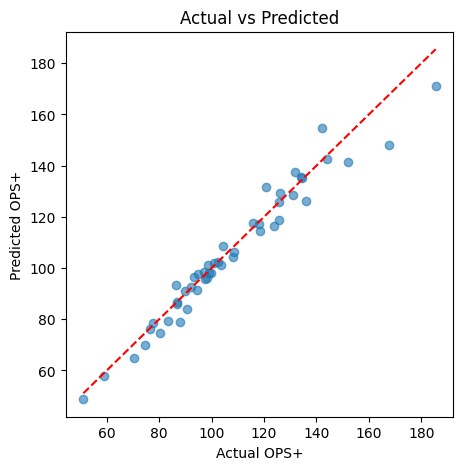

In [60]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y_test_orig, y_pred, alpha=0.6)
ax.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
ax.set_xlabel("Actual OPS+")
ax.set_ylabel("Predicted OPS+")
ax.set_title("Actual vs Predicted")
plt.show()

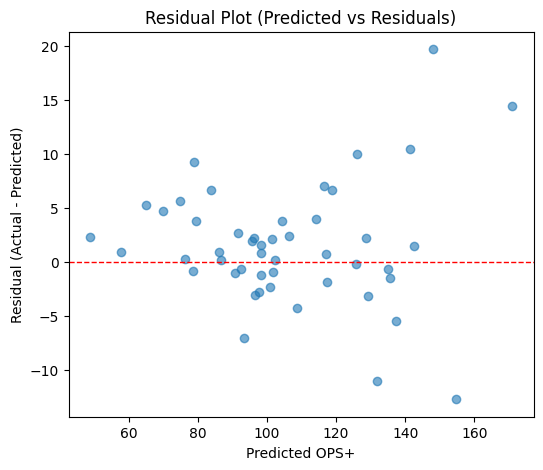

In [61]:
residuals = y_test_orig - y_pred

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(y_pred, residuals, alpha=0.6)
ax.axhline(0, color='red', linestyle='--', linewidth=1)

ax.set_xlabel("Predicted OPS+")
ax.set_ylabel("Residual (Actual - Predicted)")
ax.set_title("Residual Plot (Predicted vs Residuals)")

plt.show()

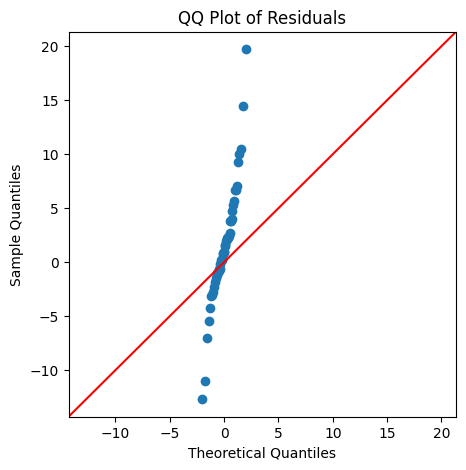

In [62]:
fig, ax = plt.subplots(figsize=(5,5))
sm.qqplot(residuals, line='45', ax=ax)
ax.set_title("QQ Plot of Residuals")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")
plt.show()

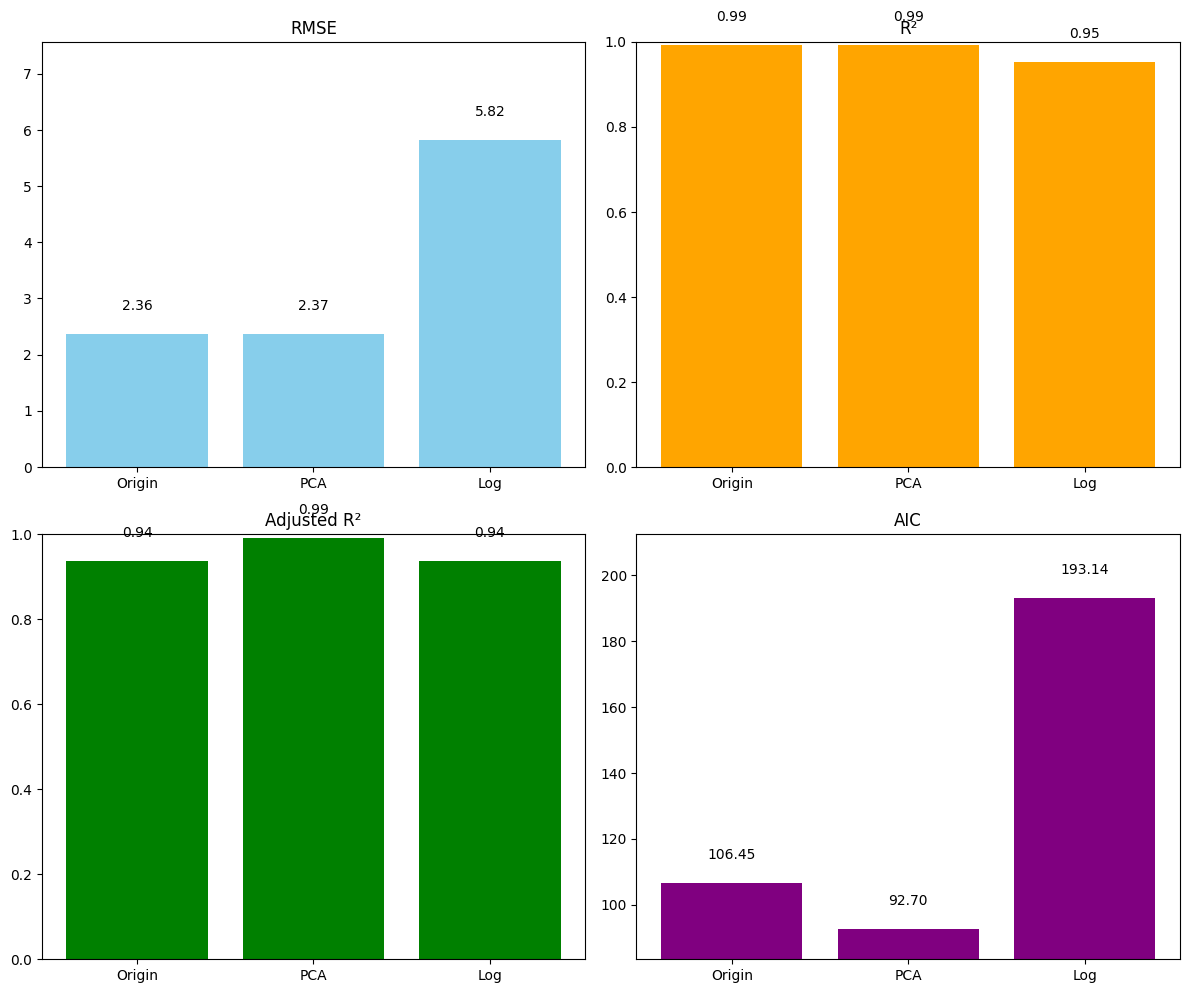

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假設三個模型的指標
# 這些變數需要先定義，例如：
# rmse1, rmse2, rmse3
# r21, r22, r23
# adj_r21, adj_r22, adj_r23
# aic1, aic2, aic3

model_labels = ['Origin', 'PCA', 'Log']

# 指標資料
rmse = [rmse1, rmse2, rmse3]
r2 = [r21, r22, r23]
adj_r2 = [adj_r21, adj_r22, adj_r23]
aic = [aic1, aic2, aic3]

fig, axs = plt.subplots(2, 2, figsize=(12,10))

# ------------------- RMSE -------------------
ymin, ymax = 0, max(rmse)*1.5  # 增加 50% 空間
axs[0,0].bar(model_labels, rmse, color='skyblue')
axs[0,0].set_ylim(ymin, ymax)
axs[0,0].set_title('RMSE')
for i, v in enumerate(rmse):
    axs[0,0].text(i, v + 0.1*(ymax-ymin), f'{v:.2f}', ha='center', va='bottom')

# ------------------- R² -------------------
ymin, ymax = 0, 1.05  # 留 5% 空白
axs[0,1].bar(model_labels, r2, color='orange')
axs[0,1].set_ylim(ymin, ymax)
axs[0,1].set_title('R²')
for i, v in enumerate(r2):
    axs[0,1].text(i, v + 0.05*(ymax-ymin), f'{v:.2f}', ha='center', va='bottom')

# ------------------- Adjusted R² -------------------
ymin, ymax = 0, 1.05
axs[1,0].bar(model_labels, adj_r2, color='green')
axs[1,0].set_ylim(ymin, ymax)
axs[1,0].set_title('Adjusted R²')
for i, v in enumerate(adj_r2):
    axs[1,0].text(i, v + 0.05*(ymax-ymin), f'{v:.2f}', ha='center', va='bottom')

# ------------------- AIC -------------------
ymin, ymax = min(aic)*0.9, max(aic)*1.2  # 留 20% 上方空白
axs[1,1].bar(model_labels, aic, color='purple')
axs[1,1].set_ylim(ymin, ymax)
axs[1,1].set_title('AIC')
for i, v in enumerate(aic):
    axs[1,1].text(i, v + 0.05*(ymax-ymin), f'{v:.2f}', ha='center', va='bottom')

# 調整子圖間距
plt.tight_layout()
plt.show()
